In [1]:
# !mkdir -p data
# !curl -o data/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc

In [2]:
import xarray as xr

In [13]:
ds = xr.open_dataset(
    "data/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc",
    chunks={"time_counter": 12, "deptht": -1, "y": 140, "x": 190}
)
ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 46, time_counter: 12, x: 722, y: 511)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(140, 190), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(140, 190), meta=np.ndarray>
  * deptht                (deptht) float32 3.0467727 9.454049 ... 5875.141
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2011-01-16T12:00:00 ... 2011-12-16T12:00:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(46, 2), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 140, 190), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 140, 190), meta=np.ndarray>
    sosstsst              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sosaline              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sowaflup              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    soshfldo              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sohefldo              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    somxl010              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    somixhgt              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sowindsp              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sohefldp              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sowafldp              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
    sobowlin              (time_counter, y, x) float32 dask.array<chunksize=(12, 140, 190), meta=np.ndarray>
Attributes:
    name:         FOCI1.14-JH024_1m_20110101_20111231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Apr-17 18:02:10 CEST
    history:      Wed Apr 17 18:47:54 2019: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.4.8

In [4]:
from dask.distributed import Client

In [14]:
client = Client(n_workers=1, threads_per_worker=2, memory_limit=2e9)
client

# 16GB / 8 threads * 50% mem target / 10 replica per task = 400 MB

/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41617 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:45457 Dashboard: /proxy/41617/status,Cluster Workers: 1 Cores: 2 Memory: 2.00 GB


In [16]:
print(client.dashboard_link)

/proxy/41617/status


In [6]:
temp = ds.votemper
salt = ds.vosaline

In [7]:
temp

<xarray.DataArray 'votemper' (time_counter: 12, deptht: 46, y: 511, x: 722)>
dask.array<open_dataset-e412e21225378b9c2d8d7c7f9917ed4cvotemper, shape=(12, 46, 511, 722), dtype=float32, chunksize=(12, 46, 270, 380), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(270, 380), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(270, 380), meta=np.ndarray>
  * deptht         (deptht) float32 3.0467727 9.454049 ... 5624.9517 5875.141
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2011-01-16T12:00:00 ... 2011-12-16T12:00:00
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  1800 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1800 s)

In [8]:
mask = (salt > 36)

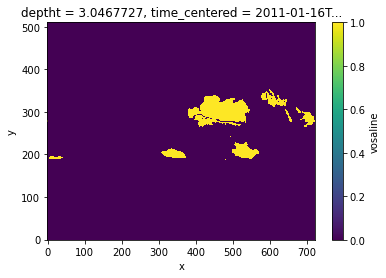

In [9]:
mask.isel(time_counter=0, deptht=0).plot();

In [10]:
from dask.distributed import wait

In [11]:
%%time

temp_sel_mean = temp.isel(x=500).where(
    mask.isel(time_counter=0, deptht=0, x=500)
).mean("time_counter")

display(temp_sel_mean)

temp_sel_mean_1 = temp_sel_mean.persist()

f = wait(temp_sel_mean_1);

<xarray.DataArray 'votemper' (deptht: 46, y: 511)>
dask.array<mean_agg-aggregate, shape=(46, 511), dtype=float32, chunksize=(46, 270), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y) float32 dask.array<chunksize=(270,), meta=np.ndarray>
    nav_lon  (y) float32 dask.array<chunksize=(270,), meta=np.ndarray>
  * deptht   (deptht) float32 3.0467727 9.454049 ... 5624.9517 5875.141
Dimensions without coordinates: y

CPU times: user 368 ms, sys: 101 ms, total: 468 ms
Wall time: 4.09 s


In [ ]:
print(temp_sel_mean.std())

In [12]:
%%time

temp_sel_mean = temp.where(
    mask.isel(time_counter=0, deptht=0)
).isel(x=500).mean("time_counter")

display(temp_sel_mean)

temp_sel_mean_2 = temp_sel_mean.persist()

f = wait(temp_sel_mean_2);

<xarray.DataArray 'votemper' (deptht: 46, y: 511)>
dask.array<mean_agg-aggregate, shape=(46, 511), dtype=float32, chunksize=(46, 270), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y) float32 dask.array<chunksize=(270,), meta=np.ndarray>
    nav_lon  (y) float32 dask.array<chunksize=(270,), meta=np.ndarray>
  * deptht   (deptht) float32 3.0467727 9.454049 ... 5624.9517 5875.141
Dimensions without coordinates: y

CPU times: user 502 ms, sys: 132 ms, total: 633 ms
Wall time: 6.25 s
